In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [78]:
cellnums = pd.read_csv('data/cellnums.csv', index_col=0, header=None).squeeze()

In [86]:
ecar_all = pd.read_csv('data/ECAR.csv', skiprows=1)
ocr_all = pd.read_csv('data/OCR.csv', skiprows=1)

In [87]:
ecar_norm = ecar_all.copy()
ocr_norm = ocr_all.copy()
alps = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
for r in alps:
    for c in range(1, 13):
        try:
            well = '{0}{1}'.format(r, c)
            ecar_norm[well] = ecar_all[well]/cellnums[well]
            ocr_norm[well] =  ocr_all[well]/cellnums[well]
        except:
            print(well)

In [88]:
flatten = lambda l: [item for sublist in l for item in sublist]
c_si = flatten([[i,]*4 for i in ('siHIFv1', 'siHIFv2', 'siNC')])
c_rosi = ['Rosi','Rosi', 'DMSO','DMSO']*4
r_day = flatten([['Day4', ] * 4, ['Day4', ] * 4, ])
r_assay = flatten([['glucA', ] * 3, ['glucB', ] * 3, ['mito', ] * 2])

In [89]:
def parse_data(data):
    cond = dict()
    for nr, rows in enumerate(flatten([((alps[i], alps[i+1]), (alps[i], alps[i+1])) for i in range(0, 8, 2)])):
        for nc, cols in enumerate(flatten([((i, i+1), (i, i+1)) for i in range(1, 13, 2)])):
            condname = '{0}{1}_{2}_{3}'.format(r_day[nr], c_rosi[nc], c_si[nc], r_assay[nr])
            wells = flatten([['{0}{1}'.format(i,j) for i in rows] for j in cols])
            cond[condname] = np.vstack([data[w] for w in wells])
    return cond

In [90]:
import seaborn.timeseries
def _plot_std_bars(central_data=None, ci=None, data=None, *args, **kwargs):
    std = data.std(axis=0)
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_bars(*args, **kwargs)
def _plot_std_band(central_data=None, ci=None, data=None, *args, **kwargs):
    std = data.std(axis=0)
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
seaborn.timeseries._plot_std_bars = _plot_std_bars
seaborn.timeseries._plot_std_band = _plot_std_band

In [91]:
ecarst = []
ocrst = []
for i in ['Day4DMSO_siNC_glucB', 'Day4Rosi_siNC_glucB', 'Day4Rosi_siHIFv1_glucB', 'Day4Rosi_siHIFv2_glucB']:
    ecarst.append(parse_data(ecar_norm)[i])
    ocrst.append(parse_data(ocr_norm)[i])
_timeecar = ecar_norm['TIME (min)']
_timeocr = ocr_norm['TIME (min)']

Text(0, 0.5, 'OCR (pmol/min/cell)')

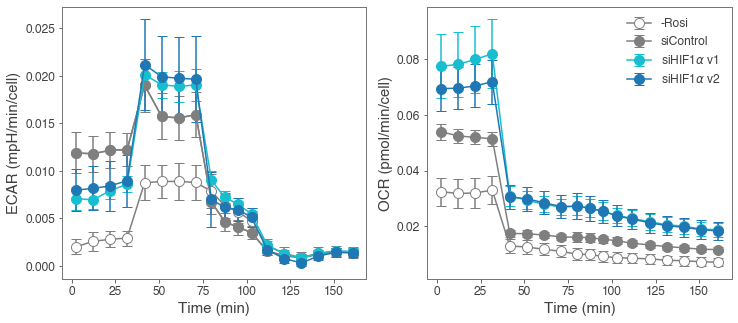

In [93]:
pkws = dict(capsize=5, marker='o', markersize=10)
pkws1 = dict(marker='o', markersize=10, alpha=1)

fig, ax= plt.subplots(1, 2, figsize=(12, 5))
ax[0].errorbar(x=_timeecar, y=np.nanmean(ecarst[0], axis=0), yerr=np.std(ecarst[0], axis=0), color='tab:gray', label='siControl-Rosi',  markerfacecolor='w', **pkws)
ax[0].errorbar(x=_timeecar, y=np.mean(ecarst[1], axis=0), yerr=np.std(ecarst[1], axis=0), color='tab:gray', label=r'siControl', **pkws)
ax[0].plot(_timeecar, np.mean(ecarst[1], axis=0), color='tab:gray', label=r'siControl', **pkws1)

ax[0].errorbar(x=_timeecar, y=np.mean(ecarst[2], axis=0), yerr=np.std(ecarst[2], axis=0), color='tab:cyan', label=r'siHIF1$\alpha$ v1', **pkws)
ax[0].errorbar(x=_timeecar, y=np.mean(ecarst[3], axis=0), yerr=np.std(ecarst[3], axis=0), color='tab:blue', label=r'siHIF1$\alpha$ v2', **pkws)

ax[1].errorbar(x=_timeecar, y=np.mean(ocrst[0], axis=0), yerr=np.std(ocrst[0], axis=0), color='tab:gray', label='siControl-Rosi', markerfacecolor='w', **pkws)
ax[1].errorbar(x=_timeecar, y=np.mean(ocrst[1], axis=0), yerr=np.std(ocrst[1], axis=0), color='tab:gray', label=r'siControl', **pkws)
ax[1].errorbar(x=_timeecar, y=np.mean(ocrst[2], axis=0), yerr=np.std(ocrst[2], axis=0), color='tab:cyan', label=r'siHIF1$\alpha$ v1', **pkws)
ax[1].errorbar(x=_timeecar, y=np.mean(ocrst[3], axis=0), yerr=np.std(ocrst[3], axis=0), color='tab:blue', label=r'siHIF1$\alpha$ v2', **pkws)


ax[1].legend(['-Rosi', 'siControl', r'siHIF1$\alpha$ v1', r'siHIF1$\alpha$ v2'], frameon=False, prop={'size': 12})
ax[0].set_xlabel('Time (min)', fontsize=15)
ax[1].set_xlabel('Time (min)', fontsize=15)
ax[0].set_ylabel('ECAR (mpH/min/cell)', fontsize=15)
ax[1].set_ylabel('OCR (pmol/min/cell)', fontsize=15)

In [94]:
OCRbasal_v1 = parse_data(ocr_norm)['Day4Rosi_siHIFv1_glucB'][:, :4].mean(axis=1)
OCRbasal_v2 = parse_data(ocr_norm)['Day4Rosi_siHIFv2_glucB'][:, :4].mean(axis=1)
OCRbasal_nc = parse_data(ocr_norm)['Day4Rosi_siNC_glucB'][:, :4].mean(axis=1)
OCRbasal_nc0 = parse_data(ocr_norm)['Day4DMSO_siNC_glucB'][:, :4].mean(axis=1)

OCRrot_v1 = parse_data(ocr_norm)['Day4Rosi_siHIFv1_glucB'][:, 4:8].mean(axis=1)
OCRrot_v2 = parse_data(ocr_norm)['Day4Rosi_siHIFv2_glucB'][:, 4:8].mean(axis=1)
OCRrot_nc = parse_data(ocr_norm)['Day4Rosi_siNC_glucB'][:, 4:8].mean(axis=1)
OCRrot_nc0 = parse_data(ocr_norm)['Day4DMSO_siNC_glucB'][:, 4:8].mean(axis=1)

According to the white paper, CCF of the Seahorse XFe96/XF96 is 0.61. 
$$mitoOCR = OCR_{basal} - OCR_{Rot/AA}$$
$$CCF = mitoPER/mitoOCR$$
$$mitoPER = CCF \times mitoOCR$$

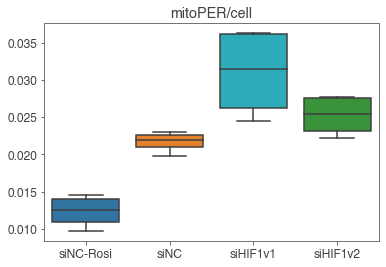

In [96]:
mitoPER_v1 = 0.61 * (OCRbasal_v1 - OCRrot_v1)
mitoPER_v2 = 0.61 * (OCRbasal_v2 - OCRrot_v2)
mitoPER_nc = 0.61 * (OCRbasal_nc - OCRrot_nc)
mitoPER_nc0 = 0.61 * (OCRbasal_nc0 - OCRrot_nc0)

mitoPERs = [mitoPER_nc0, mitoPER_nc, mitoPER_v1, mitoPER_v2]

fig, ax = plt.subplots(1, 1)
sns.boxplot(data=mitoPERs, ax=ax)
ax.set_title('mitoPER/cell')
ax.set_xticklabels(['siNC-Rosi', 'siNC', 'siHIF1v1', 'siHIF1v2']);

Kvol = 1.60 and Vol is 2.28 uL.

$$PER = ECAR \times BF \times Vol \times Kvol$$
$$glycoPER = PER - mitoPER = ECAR \times BF \times 2.28 \times 1.60 - mitoPER$$

After addition of 2DG, glycoPER suppose to be 0. Estimate BF by fitting.

In [98]:
def _fitbf(bf):
    knum = 1
    ecar = parse_data(ecar_norm)[keys[knum]]
    glycoper = (ecar * bf * 2.28 * 1.60) - np.tile(mitoPERs[knum], (18, 1)).T
    return np.abs(np.mean(glycoper.T[-5:]))

In [99]:
keys = ('Day4DMSO_siNC_glucB','Day4Rosi_siNC_glucB', 'Day4Rosi_siHIFv1_glucB', 'Day4Rosi_siHIFv2_glucB')
from scipy.optimize import minimize
ret = minimize(_fitbf, x0=1)
BF = float(ret.x)

print(BF)

4.932657926840999


In [100]:
st = []
for anum, (key, mper) in enumerate(zip(keys, mitoPERs)):
    ecar = parse_data(ecar_norm)[key]
    glycoper = (ecar * BF * 2.28 * 1.60) - np.tile(mper, (18, 1)).T
    st.append(glycoper)
_time = np.array(ecar_norm['TIME (min)'])

In [101]:
glycoper_store = []
for anum, (key, mper) in enumerate(zip(keys, mitoPERs)):
    ecar = parse_data(ecar_norm)[key]
    glycoper = (ecar * BF * 2.28 * 1.60) - np.tile(mper, (18, 1)).T
    glycoper_store.append(glycoper[:, :4].flatten())
gs = np.array(glycoper_store)
df = pd.DataFrame(gs.T, columns=['siControl-Rosi', 'siControl', r'siHIF1$\alpha$ v1', r'siHIF1$\alpha$ v2'])

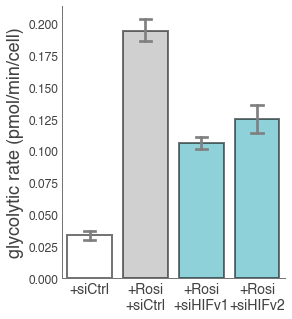

In [111]:
fig, ax= plt.subplots(1, 1, figsize=(4, 5))
palette = [[0.66, 0.66, 0.66],[0.66, 0.66, 0.66], 'tab:cyan', 'tab:cyan']

palette1=[[1, 1, 1],[0.66, 0.66, 0.66], 'tab:cyan', 'tab:cyan']
barprop = dict(ci=68, alpha=0.54, capsize=0.2, errcolor='gray', edgecolor='k', linewidth=2.0)
bar = sns.barplot(data=df, palette=palette1, **barprop)

ax.set_ylabel('glycolytic rate (pmol/min/cell)', fontsize=18)
ax.set_xticklabels(['+siCtrl', '+Rosi\n+siCtrl', '+Rosi\n+siHIFv1', '+Rosi\n+siHIFv2'], horizontalalignment='center', fontsize=14)
# ax.set_xticks(np.array([-0.6, 0.4, 1.4, 2.5])+0.2)
ax.tick_params(length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)